In [38]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import scipy as sp
import copy
import os


In [39]:
directory = os.getcwd()
df = pd.read_csv(directory+"/results.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Round_name           1350 non-null   object 
 1   Run_id               1350 non-null   object 
 2   Version              1350 non-null   object 
 3   Total_timespan       1350 non-null   int64  
 4   Total_travel_time    1350 non-null   int64  
 5   Average_travel_Time  1350 non-null   float64
 6   Max_Travel_time      1350 non-null   int64  
 7   Total_#_cars         1350 non-null   int64  
 8   #_finished           1350 non-null   int64  
 9   Deadline Misses      1350 non-null   int64  
 10  Deadline_overTime    1350 non-null   int64  
 11  Time                 1350 non-null   float64
 12  Teleport_Jam         1350 non-null   int64  
 13  Teleport_Yield       1350 non-null   int64  
 14  Teleport_Wrong_Lane  1350 non-null   int64  
 15  #_Collisions         1350 non-null   i

In [42]:

#Time_best = {}
Traffic_incidents = {}

Traffic_incidents['Micro'] = {}
Traffic_incidents['Micro']['teleports']=0
Traffic_incidents['Micro']['Collisions']=0
Traffic_incidents['Meso'] = {}
Traffic_incidents['Meso']['teleports']=0
Traffic_incidents['Meso']['Collisions']=0
Traffic_incidents['Macro'] = {}
Traffic_incidents['Macro']['teleports']=0
Traffic_incidents['Macro']['Collisions']=0

# Traffic_incidents['UH']

# Traffic_incidents['UH']['Meso']
# Traffic_incidents['UH']['Macro']
# Traffic_incidents['Random']['Micro']
# Traffic_incidents['Random']['Meso']
# Traffic_incidents['Random']['Macro']
# Traffic_incidents['Braess']['Micro']
# Traffic_incidents['Braess']['Meso']
# Traffic_incidents['Braess']['Macro']
# maps = {'UH':'4corners_neighborhoods.net.xml-test-',
#        'Random':'Random_English.net.xml-test_R-',
#        'Braess':'Braess_Homebrew_fixed1.net.xml-test-'}
methods = ['Micro','Meso','Macro']



    #temp_name = base_name + str(x) + "-Iteration-"+str(y)
    #print(temp_name)
    #print(df['Deadline Misses'].loc[(df['Version']=='DUE.9.5')&(df['Round_name']==temp_name)])


c1 = df['Teleport_Jam'].loc[(df['Version']=='Micro-DUE.9.5')]
Traffic_incidents['Micro']['teleports'] +=sum(c1)
c1 = df['Teleport_Yield'].loc[(df['Version']=='Micro-DUE.9.5')]
Traffic_incidents['Micro']['teleports'] +=sum(c1)
c1 = df['Teleport_Wrong_Lane'].loc[(df['Version']=='Micro-DUE.9.5')]
Traffic_incidents['Micro']['teleports'] +=sum(c1)

c1 = df['Teleport_Jam'].loc[(df['Version']=='Meso-DUE.9.5')]
Traffic_incidents['Meso']['teleports'] +=sum(c1)
c1 = df['Teleport_Yield'].loc[(df['Version']=='Meso-DUE.9.5')]
Traffic_incidents['Meso']['teleports'] +=sum(c1)
c1 = df['Teleport_Wrong_Lane'].loc[(df['Version']=='Meso-DUE.9.5')]
Traffic_incidents['Meso']['teleports'] +=sum(c1)

c1 = df['Teleport_Jam'].loc[(df['Version']=='Macro-DUE.9.5')]
Traffic_incidents['Macro']['teleports'] +=sum(c1)
c1 = df['Teleport_Yield'].loc[(df['Version']=='Macro-DUE.9.5')]
Traffic_incidents['Macro']['teleports'] +=sum(c1)
c1 = df['Teleport_Wrong_Lane'].loc[(df['Version']=='Macro-DUE.9.5')]
Traffic_incidents['Macro']['teleports'] +=sum(c1)


c1 = df['#_Collisions'].loc[(df['Version']=='Micro-DUE.9.5')]
Traffic_incidents['Micro']['Collisions'] +=sum(c1)

c1 = df['#_Collisions'].loc[(df['Version']=='Meso-DUE.9.5')]
Traffic_incidents['Meso']['Collisions'] +=sum(c1)

c1 = df['#_Collisions'].loc[(df['Version']=='Macro-DUE.9.5')]
Traffic_incidents['Macro']['Collisions'] +=sum(c1)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


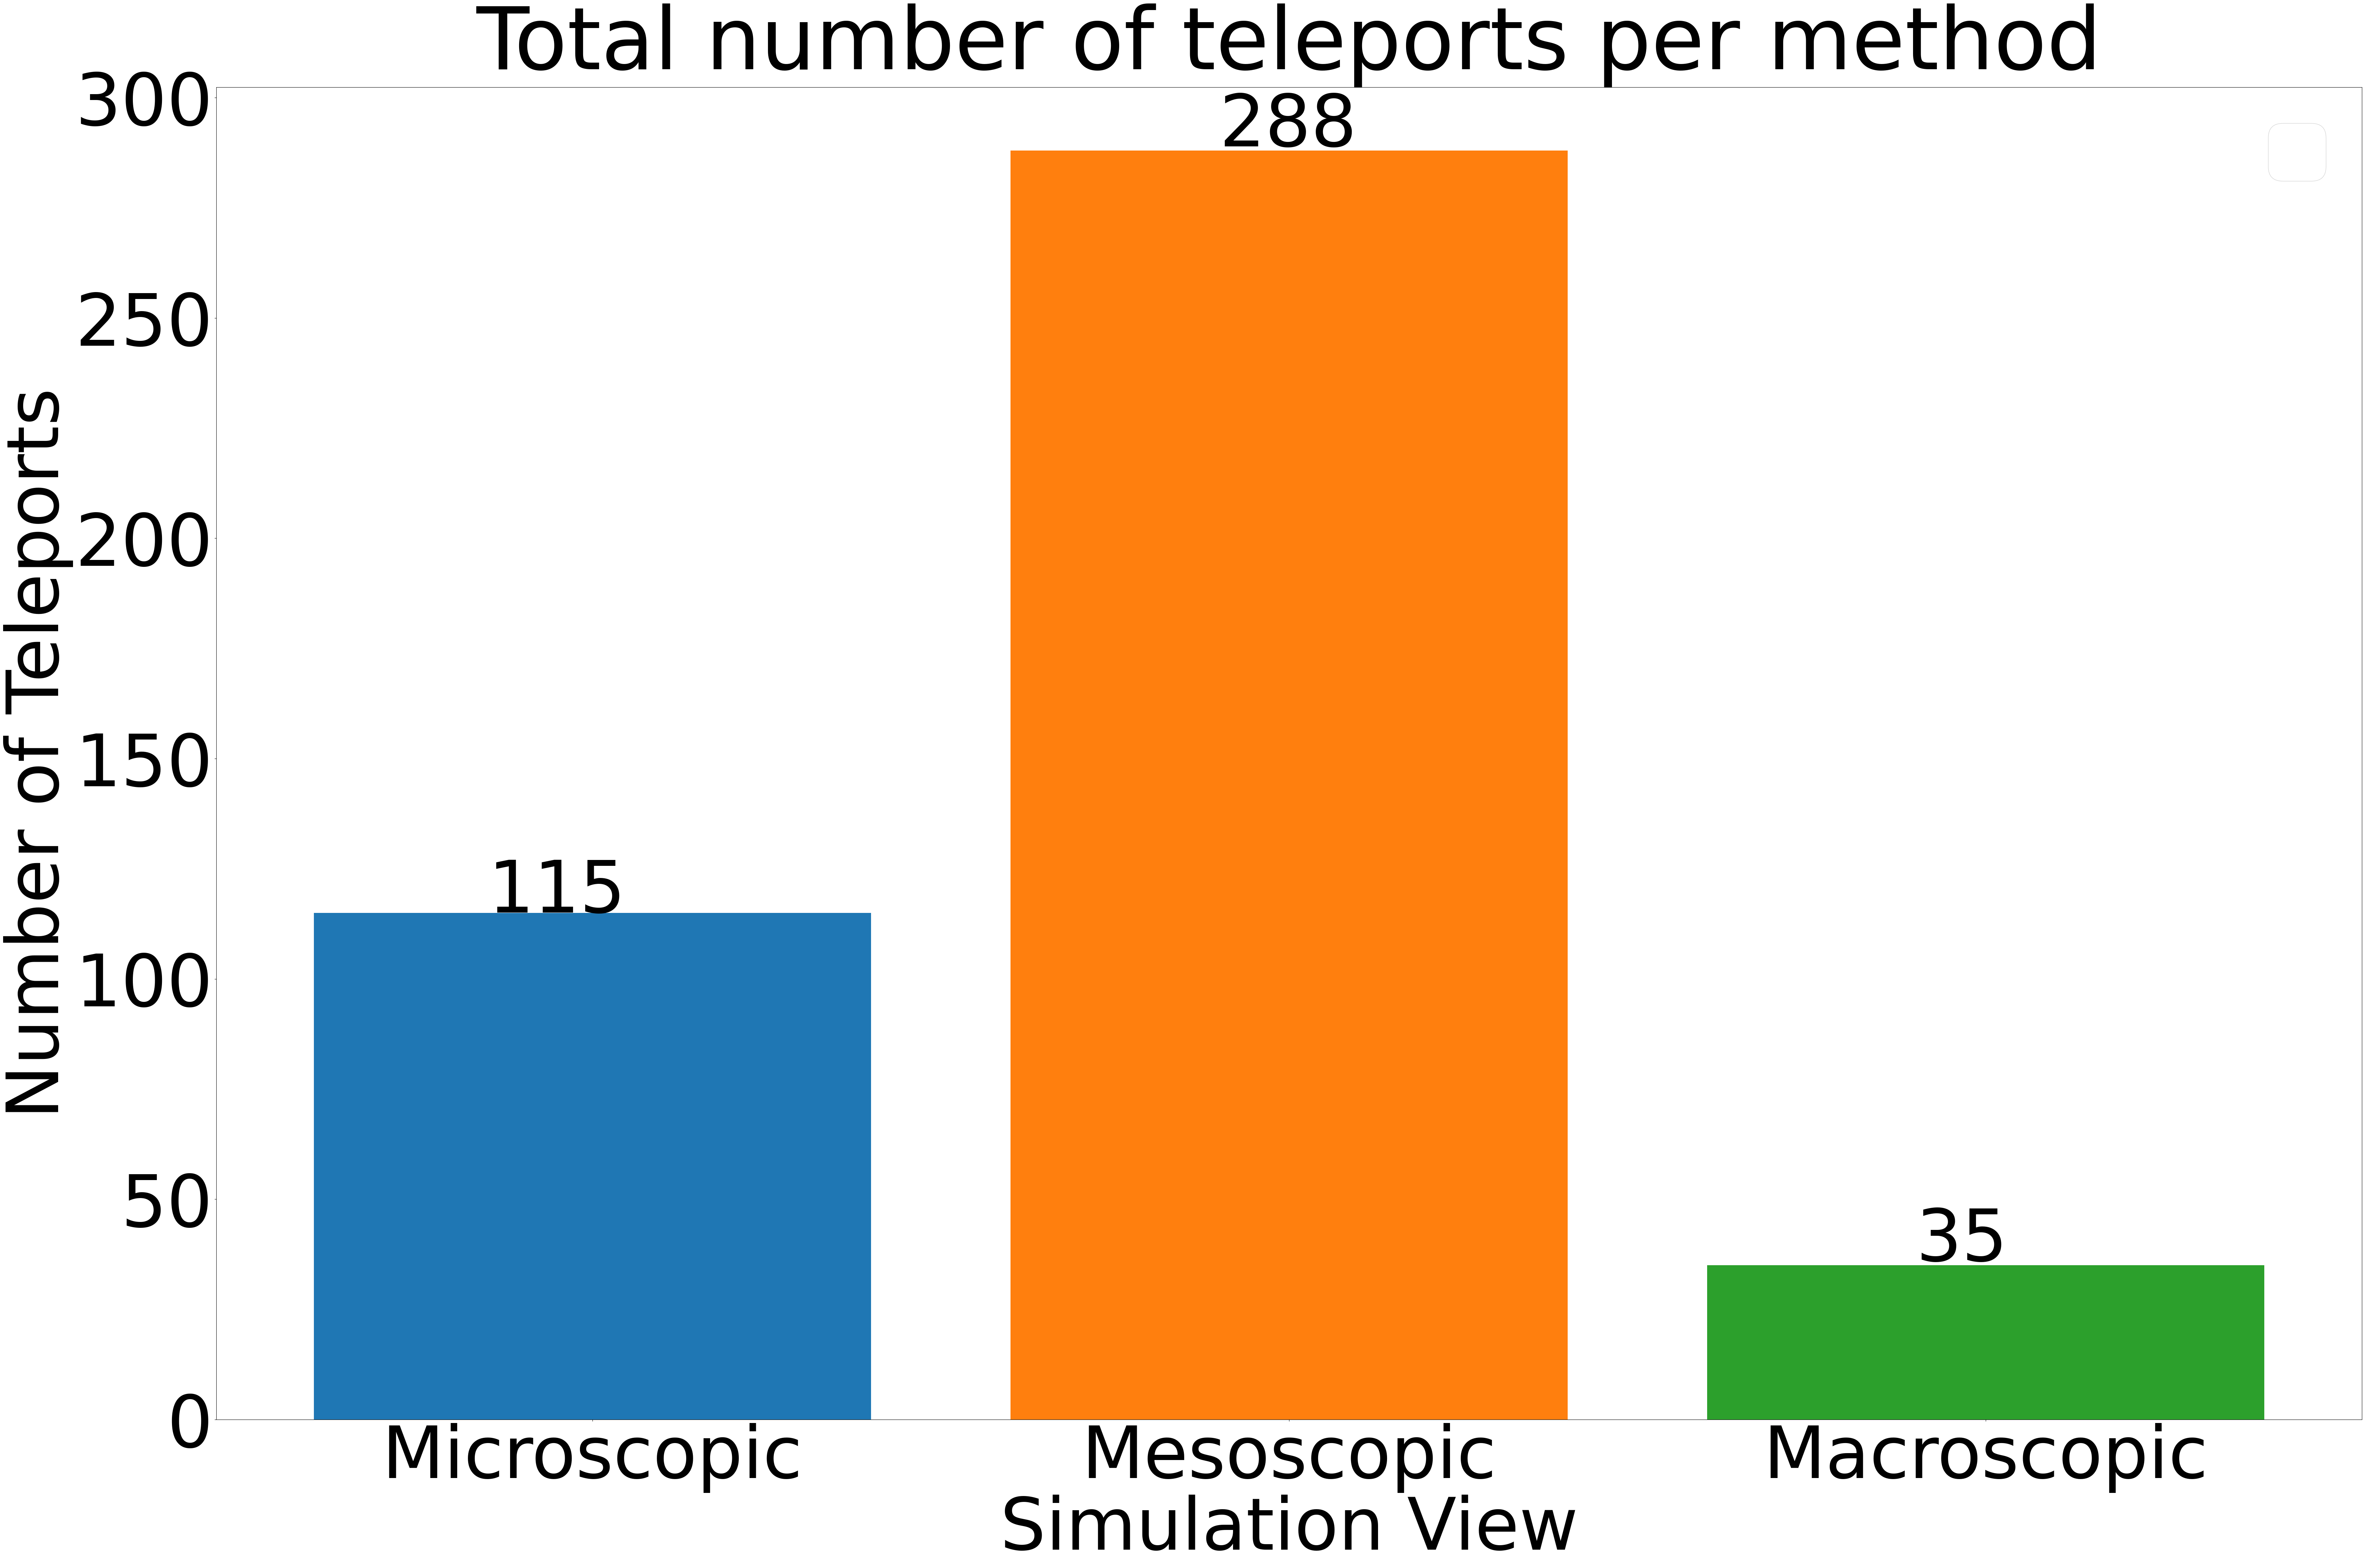

In [43]:
plt.figure(figsize = (80,50))
plt.rc('font', size=150) 
micro_t = Traffic_incidents['Micro']['teleports']
meso_t = Traffic_incidents['Meso']['teleports']
macro_t = Traffic_incidents['Macro']['teleports']
doot = plt.bar(0,micro_t)
doot = plt.bar(1,meso_t)
doot = plt.bar(2,macro_t)
name = ["Microscopic","Mesoscopic","Macroscopic"]
plt.xlabel('Simulation View')
plt.ylabel('Number of Teleports')
plt.title('Total number of teleports per method')
index = np.arange(3)
plt.xticks(ticks = index,labels = name,)
plt.text(-.15,micro_t+.1,micro_t)
plt.text(0.9,meso_t+1,meso_t)
plt.text(1.9,macro_t+1,macro_t)
plt.legend()
plt.show()


In [59]:

#Time_best = {}
Traffic_incidents = {}
Traffic_incidents['UH'] = {}
Traffic_incidents['UH']['Micro'] = {}
Traffic_incidents['UH']['Micro']['teleports']=0
Traffic_incidents['UH']['Micro']['Collisions']=0
Traffic_incidents['UH']['Meso'] = {}
Traffic_incidents['UH']['Meso']['teleports']=0
Traffic_incidents['UH']['Meso']['Collisions']=0
Traffic_incidents['UH']['Macro'] = {}
Traffic_incidents['UH']['Macro']['teleports']=0
Traffic_incidents['UH']['Macro']['Collisions']=0

Traffic_incidents['Braess'] = {}
Traffic_incidents['Braess']['Micro'] = {}
Traffic_incidents['Braess']['Micro']['teleports']=0
Traffic_incidents['Braess']['Micro']['Collisions']=0
Traffic_incidents['Braess']['Meso'] = {}
Traffic_incidents['Braess']['Meso']['teleports']=0
Traffic_incidents['Braess']['Meso']['Collisions']=0
Traffic_incidents['Braess']['Macro'] = {}
Traffic_incidents['Braess']['Macro']['teleports']=0
Traffic_incidents['Braess']['Macro']['Collisions']=0

Traffic_incidents['random'] = {}
Traffic_incidents['random']['Micro'] = {}
Traffic_incidents['random']['Micro']['teleports']=0
Traffic_incidents['random']['Micro']['Collisions']=0
Traffic_incidents['random']['Meso'] = {}
Traffic_incidents['random']['Meso']['teleports']=0
Traffic_incidents['random']['Meso']['Collisions']=0
Traffic_incidents['random']['Macro'] = {}
Traffic_incidents['random']['Macro']['teleports']=0
Traffic_incidents['random']['Macro']['Collisions']=0



# Traffic_incidents['UH']

# Traffic_incidents['UH']['Meso']
# Traffic_incidents['UH']['Macro']
# Traffic_incidents['Random']['Micro']
# Traffic_incidents['Random']['Meso']
# Traffic_incidents['Random']['Macro']
# Traffic_incidents['Braess']['Micro']
# Traffic_incidents['Braess']['Meso']
# Traffic_incidents['Braess']['Macro']
# maps = {'UH':'4corners_neighborhoods.net.xml-test-',
#        'Random':'Random_English.net.xml-test_R-',
#        'Braess':'Braess_Homebrew_fixed1.net.xml-test-'}
methods = {'Micro':'Micro-DUE.9.5','Meso':'Meso-DUE.9.5','Macro':'Macro-DUE.9.5'}
maps = {'UH':'4corners_neighborhoods.net.xml-test-',
       'random':'Random_English.net.xml-test_R-',
       'Braess':'Braess_Homebrew_fixed1.net.xml-test-'}


    #temp_name = base_name + str(x) + "-Iteration-"+str(y)
    #print(temp_name)
    #print(df['Deadline Misses'].loc[(df['Version']=='DUE.9.5')&(df['Round_name']==temp_name)])


for x in maps.keys():
    print(x)
    for y in methods.keys():
        for a in range(0,5):
            for z in range(0,30):
                temp_name = maps[x] + str(a) + "-Iteration-"+str(z)
                c1 = df['Teleport_Jam'].loc[(df['Version']==methods[y])&(df['Round_name']==temp_name)]
                #print(maps[x])
                #print(c1)
                Traffic_incidents[x][y]['teleports'] +=sum(c1)
                c1 = df['Teleport_Yield'].loc[(df['Version']==methods[y])&(df['Round_name']==temp_name)]
                Traffic_incidents[x][y]['teleports'] +=sum(c1)
                c1 = df['Teleport_Wrong_Lane'].loc[(df['Version']==methods[y])&(df['Round_name']==temp_name)]
                Traffic_incidents[x][y]['teleports'] +=sum(c1)



UH
random
Braess


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


115
32
288


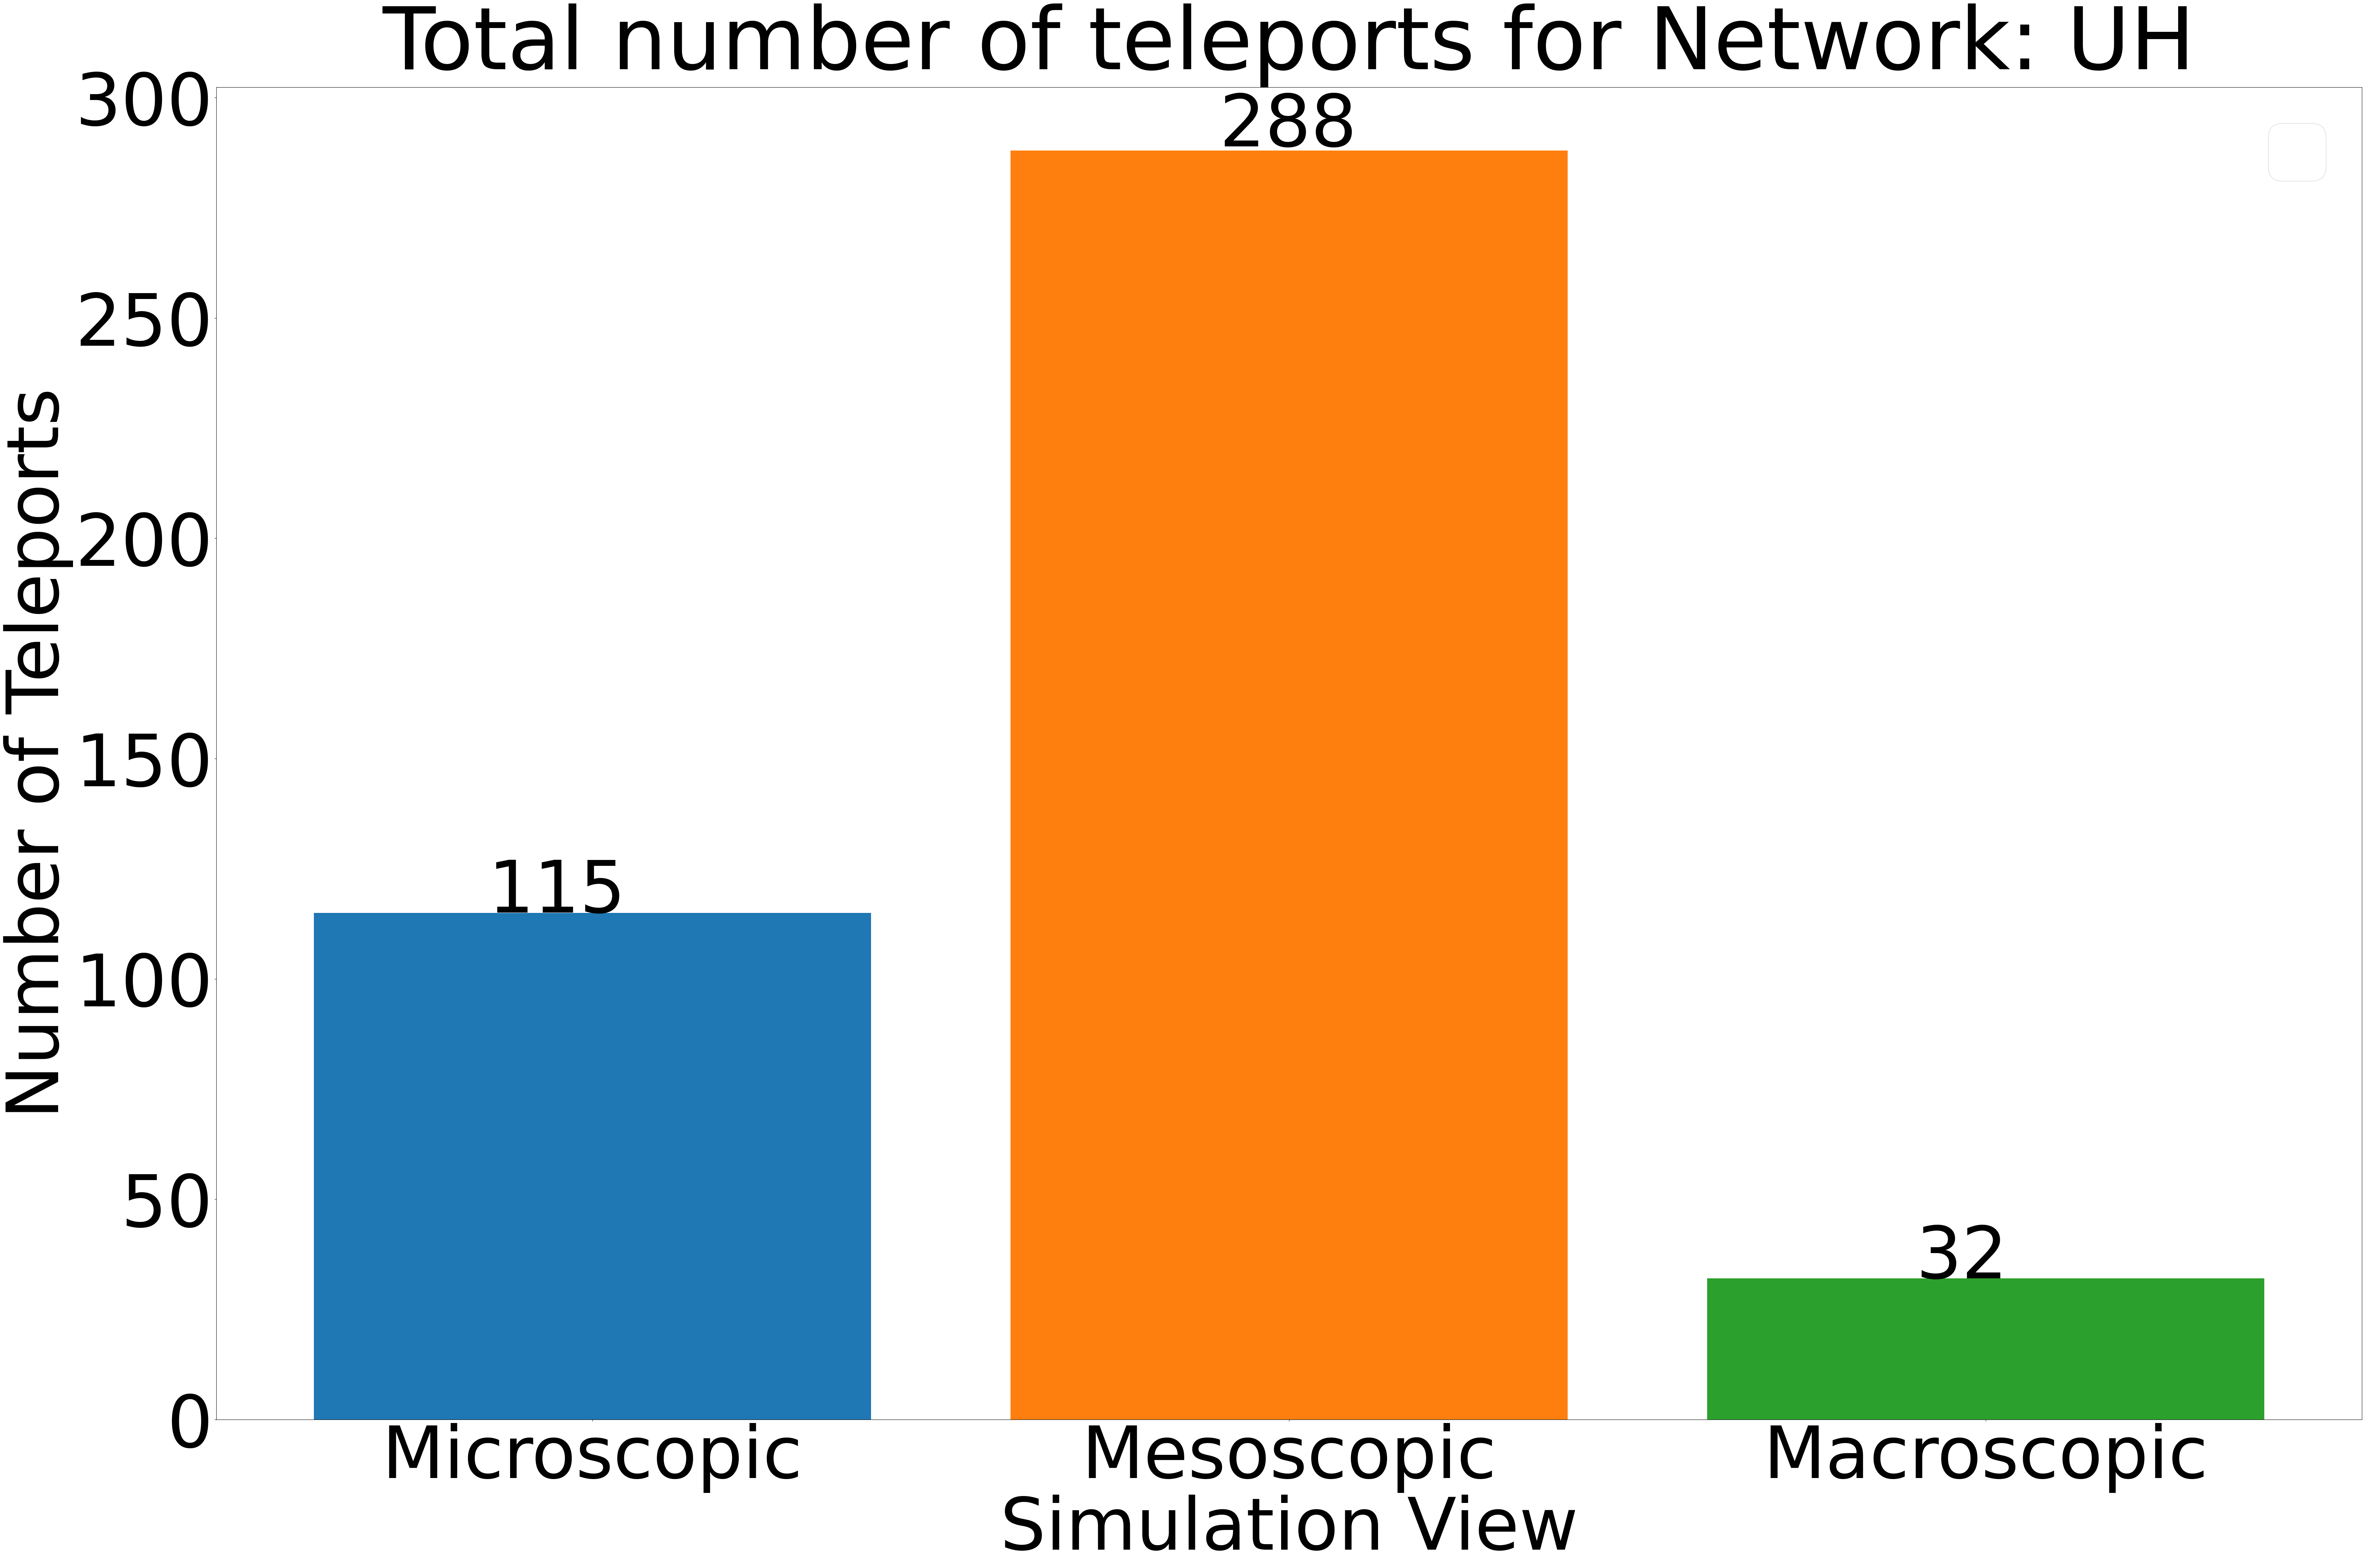

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
3
0


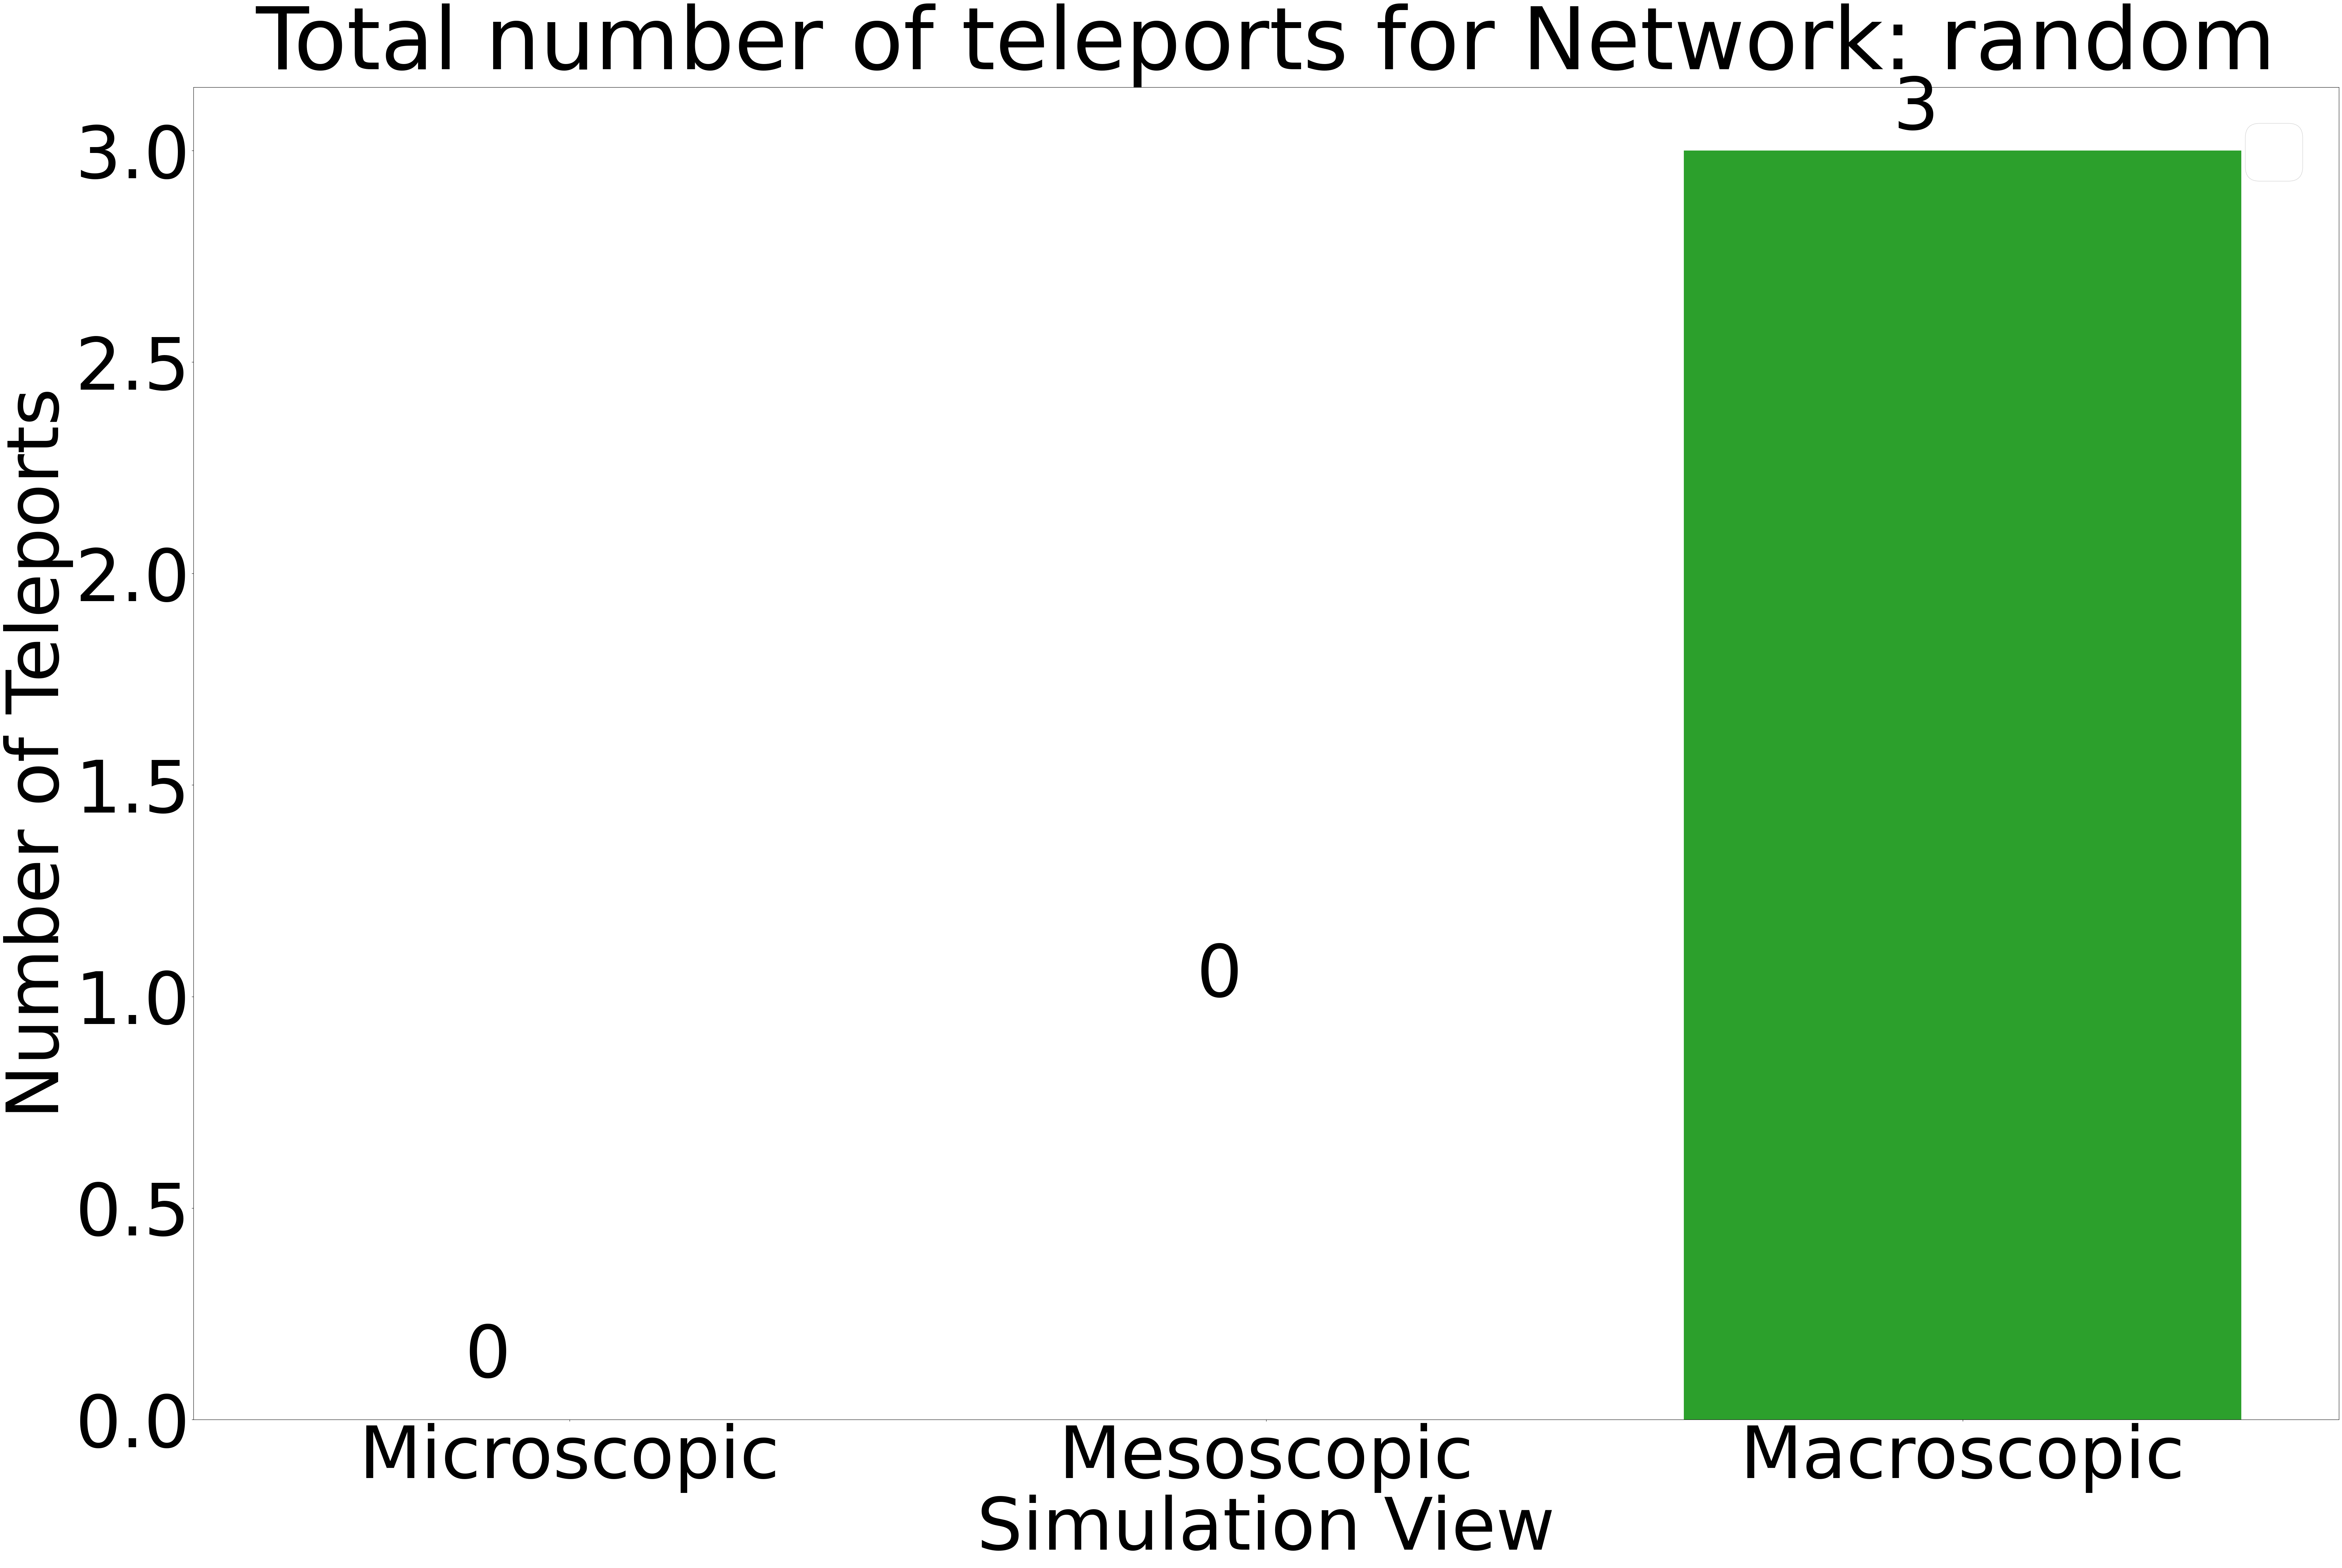

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0
0
0


In [64]:


for x in maps.keys():
    plt.figure(figsize = (80,50))
    plt.rc('font', size=150) 
    micro_t = Traffic_incidents[x]['Micro']['teleports']
    meso_t = Traffic_incidents[x]['Meso']['teleports']
    macro_t = Traffic_incidents[x]['Macro']['teleports']
    print(micro_t)
    print(macro_t)
    print(meso_t)
    doot = plt.bar(0,micro_t)
    doot = plt.bar(1,meso_t)
    doot = plt.bar(2,macro_t)
    name = ["Microscopic","Mesoscopic","Macroscopic"]
    plt.xlabel('Simulation View')
    plt.ylabel('Number of Teleports')
    plt.title('Total number of teleports for Network: '+ str(x))
    index = np.arange(3)
    plt.xticks(ticks = index,labels = name,)
    plt.text(-.15,micro_t+.1,micro_t)
    plt.text(0.9,meso_t+1,meso_t)
    plt.text(1.9,macro_t+.05,macro_t)
    plt.legend()
    plt.show()
    #break
